# Hyper-parameter selection

#### Set-up

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from fastai.vision import *

In [ ]:
path = '/gdrive/My Drive/Labeling'
model_path = os.path.join(path, 'Model')
image_path = os.path.join(model_path, 'Images')

In [ ]:
v1 = pd.read_csv(os.path.join(path, 'LabelsCSV', 'random_split', 'Metric1', 'all_labels_path_select.csv'))

cols = ['group_2', 'group_3', 'group_4', 'group_original']
for c in cols:
  v1[c] = v1[c].astype(int).astype(str)

v1_2 = v1.filter(items=['image', 'group_2'])
v1_3 = v1.filter(items=['image', 'group_3'])
v1_4 = v1.filter(items=['image', 'group_4'])
v1_original = v1.filter(items=['image', 'group_original'])

In [ ]:
v2 = pd.read_csv(os.path.join(path, 'LabelsCSV', 'random_split', 'Metric2', 'all_labels_path_metric_2_select.csv'))

cols = ['group_2', 'group_3', 'group_4', 'group_original']
for c in cols:
  v2[c] = v2[c].astype(int).astype(str)

v2_2 = v2.filter(items=['image', 'group_2'])
v2_3 = v2.filter(items=['image', 'group_3'])
v2_4 = v2.filter(items=['image', 'group_4'])
v2_original = v2.filter(items=['image', 'group_original'])

In [ ]:
print(len(v1), len(v2))

for image in np.unique(v1['image']):
  if image not in np.unique(v2['image']):
    print(image, 'is in v1 but not v2.')

for image in np.unique(v2['image']):
  if image not in np.unique(v1['image']):
    print(image, 'is in v2 but not v1.')

354 354


In [ ]:
print(v1_2.head())
print(v2_2.head())

                 image group_2
0  970326927s217ms.jpg       1
1  969905690s171ms.jpg       0
2  970328921s697ms.jpg       0
3  970328286s696ms.jpg       0
4  969902590s234ms.jpg       0
                 image group_2
0  969905031s180ms.jpg       0
1  970328295s705ms.jpg       0
2  969906484s651ms.jpg       1
3  970588333s253ms.jpg       0
4  970330410s170ms.jpg       0


In [ ]:
print(v1_3.head())
print(v2_3.head())

                 image group_3
0  970326927s217ms.jpg       2
1  969905690s171ms.jpg       0
2  970328921s697ms.jpg       0
3  970328286s696ms.jpg       0
4  969902590s234ms.jpg       0
                 image group_3
0  969905031s180ms.jpg       0
1  970328295s705ms.jpg       1
2  969906484s651ms.jpg       1
3  970588333s253ms.jpg       0
4  970330410s170ms.jpg       0


In [ ]:
print(v1_4.head())
print(v2_4.head())

                 image group_4
0  970326927s217ms.jpg       2
1  969905690s171ms.jpg       0
2  970328921s697ms.jpg       1
3  970328286s696ms.jpg       0
4  969902590s234ms.jpg       0
                 image group_4
0  969905031s180ms.jpg       0
1  970328295s705ms.jpg       1
2  969906484s651ms.jpg       2
3  970588333s253ms.jpg       0
4  970330410s170ms.jpg       0


In [ ]:
print(v1_original.head())
print(v2_original.head())

                 image group_original
0  970326927s217ms.jpg              3
1  969905690s171ms.jpg              0
2  970328921s697ms.jpg              1
3  970328286s696ms.jpg              0
4  969902590s234ms.jpg              1
                 image group_original
0  969905031s180ms.jpg              0
1  970328295s705ms.jpg              2
2  969906484s651ms.jpg              2
3  970588333s253ms.jpg              1
4  970330410s170ms.jpg              1


#### v8 vs. v12

##### v8

In [ ]:
# Data for evaluating the model
v1_2['is_valid'] = True

# Placeholder training data to load into the model
train1_2 = v1_2.copy(deep=True)
train1_2['is_valid'] = False
train1_2 = train1_2[0:64]

data1_2 = train1_2.append(v1_2)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data1_2)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_2')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v8', 'v8-transforms-stage-2-rn50'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.7119)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

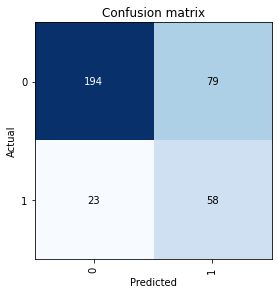

In [ ]:
interp.plot_confusion_matrix()

##### v12

In [ ]:
# Data for evaluating the model
v2_2['is_valid'] = True

# Placeholder training data to load into the model
train2_2 = v2_2.copy(deep=True)
train2_2['is_valid'] = False
train2_2 = train2_2[0:64]

data2_2 = train2_2.append(v2_2)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data2_2)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_2')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v12', 'v12-stage-2'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.7345)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

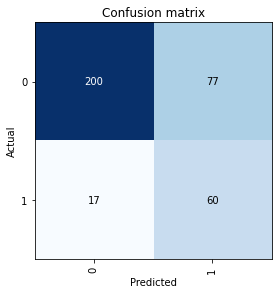

In [ ]:
interp.plot_confusion_matrix()

#### v9 vs. v13

##### v9

In [ ]:
# Data for evaluating the model
v1_3['is_valid'] = True

# Placeholder training data to load into the model
train1_3 = v1_3.copy(deep=True)
train1_3['is_valid'] = False
train1_3 = train1_3[0:64]

data1_3 = train1_3.append(v1_3)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data1_3)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_3')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v9', 'v9-stage-2-rn50'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.5565)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

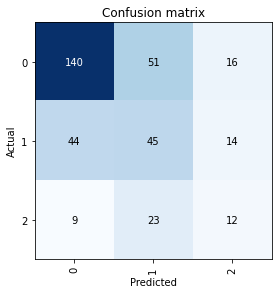

In [ ]:
interp.plot_confusion_matrix()

##### v13

In [ ]:
# Data for evaluating the model
v2_3['is_valid'] = True

# Placeholder training data to load into the model
train2_3 = v2_3.copy(deep=True)
train2_3['is_valid'] = False
train2_3 = train2_3[0:64]

data2_3 = train2_3.append(v2_3)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data2_3)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_3')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v13', 'v13-stage-2'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.6017)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

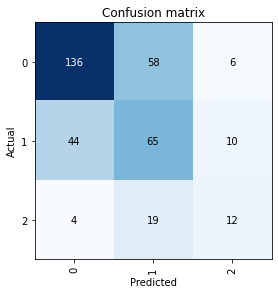

In [ ]:
interp.plot_confusion_matrix()

#### v10 vs. v14

##### v10

In [ ]:
# Data for evaluating the model
v1_4['is_valid'] = True

# Placeholder training data to load into the model
train1_4 = v1_4.copy(deep=True)
train1_4['is_valid'] = False
train1_4 = train1_4[0:64]

data1_4 = train1_4.append(v1_4)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data1_4)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_4')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v10', 'v10-stage-2-rn50'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.4576)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

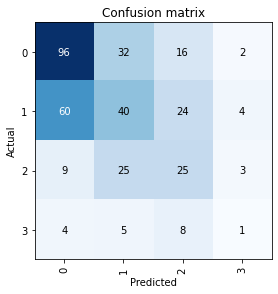

In [ ]:
interp.plot_confusion_matrix()

##### v14

In [ ]:
# Data for evaluating the model
v2_4['is_valid'] = True

# Placeholder training data to load into the model
train2_4 = v2_4.copy(deep=True)
train2_4['is_valid'] = False
train2_4 = train2_4[0:64]

data2_4 = train2_4.append(v2_4)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data2_4)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_4')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v14', 'v14-stage-2'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.5000)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

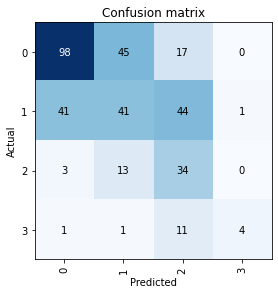

In [ ]:
interp.plot_confusion_matrix()

#### v11 vs. v15

##### v11

In [ ]:
# Data for evaluating the model
v1_original['is_valid'] = True

# Placeholder training data to load into the model
train1_original = v1_original.copy(deep=True)
train1_original['is_valid'] = False
train1_original = train1_original[0:64]

data1_original = train1_original.append(v1_original)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data1_original)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_original')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v11', 'v11-stage-2-rn50'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.3475)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

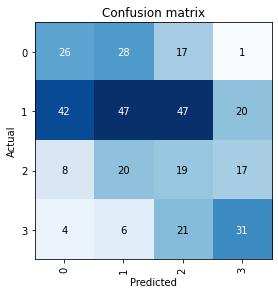

In [ ]:
interp.plot_confusion_matrix()

##### v15

In [ ]:
# Data for evaluating the model
v2_original['is_valid'] = True

# Placeholder training data to load into the model
train2_original = v2_original.copy(deep=True)
train2_original['is_valid'] = False
train2_original = train2_original[0:64]

data2_original = train2_original.append(v2_original)

In [ ]:
np.random.seed(42)
data = (ImageList
        .from_df(path=image_path, df=data2_original)
        .split_from_df(col='is_valid')
        .label_from_df(cols='group_original')
        .transform(get_transforms(do_flip=False), size=(270,480))
        .databunch(bs=64)
        .normalize())

In [ ]:
train_x = data.train_ds.x
train_y = data.train_ds.y
valid_x = data.valid_ds.x
valid_y = data.valid_ds.y

print(len(train_x), len(train_y))
print(len(valid_x), len(valid_y))

64 64
354 354


In [ ]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy])

In [ ]:
learn.load(os.path.join(model_path, 'v15', 'v15-stage-2'))

In [ ]:
preds, ys = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(preds, ys)

tensor(0.4548)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

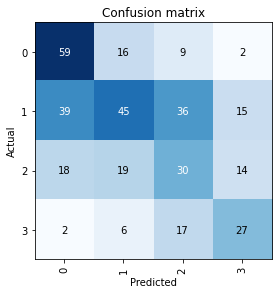

In [ ]:
interp.plot_confusion_matrix()

#### Confusion matrix to accuracy by class

In [ ]:
def accuracy_by_class(cm):
  accuracies = []

  for i in range(len(cm)):
    row_total = 0
    num_correct = 0
    for j in range(len(cm[0])):
      row_total += cm[i][j]
      if i == j:
        num_correct = cm[i][j]
    
    accuracy = round((num_correct/row_total) * 100, 2)
    accuracies.append(accuracy)
    print('Class', i, ':', accuracy)
  
  print('Average:', round(sum(accuracies) / len(accuracies), 2))

In [ ]:
cm1_2 = [[194, 79], [23, 58]]
accuracy_by_class(cm1_2)

Class 0 : 71.06
Class 1 : 71.6
Average: 71.33


In [ ]:
cm2_2 = [[200, 77], [17, 60]]
accuracy_by_class(cm2_2)

Class 0 : 72.2
Class 1 : 77.92
Average: 75.06


In [ ]:
cm1_3 = [[140, 51, 16],
         [44, 45, 14],
         [9, 23, 12]]
accuracy_by_class(cm1_3)

Class 0 : 67.63
Class 1 : 43.69
Class 2 : 27.27
Average: 46.2


In [ ]:
cm2_3 = [[136, 58, 6],
         [44, 65, 10],
         [4, 19, 12]]
accuracy_by_class(cm2_3)

Class 0 : 68.0
Class 1 : 54.62
Class 2 : 34.29
Average: 52.3


In [ ]:
cm1_4 = [[96, 32, 16, 2],
         [60, 40, 24, 4],
         [9, 25, 25, 3],
         [4, 5, 8, 1]]
accuracy_by_class(cm1_4)

Class 0 : 65.75
Class 1 : 31.25
Class 2 : 40.32
Class 3 : 5.56
Average: 35.72


In [ ]:
cm2_4 = [[98, 45, 17, 0],
         [41, 41, 44, 1],
         [3, 13, 34, 0],
         [1, 1, 11, 4]]
accuracy_by_class(cm2_4)

Class 0 : 61.25
Class 1 : 32.28
Class 2 : 68.0
Class 3 : 23.53
Average: 46.27


In [ ]:
cm1_original = [[26, 28, 17, 1],
         [42, 47, 47, 20],
         [8, 20, 19, 17],
         [4, 6, 21, 31]]
accuracy_by_class(cm1_original)

Class 0 : 36.11
Class 1 : 30.13
Class 2 : 29.69
Class 3 : 50.0
Average: 36.48


In [ ]:
cm2_original = [[59, 16, 9, 2],
         [39, 45, 36, 15],
         [18, 19, 30, 14],
         [2, 6, 17, 27]]
accuracy_by_class(cm2_original)

Class 0 : 68.6
Class 1 : 33.33
Class 2 : 37.04
Class 3 : 51.92
Average: 47.72
